In [1]:
import math

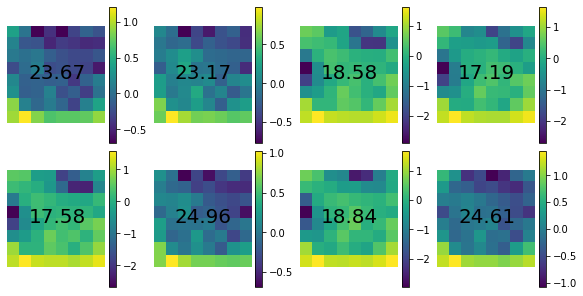

In [34]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm as _pltcolormap
from matplotlib import colors as _pltcolors
import numpy as np
import pandas as pd
import sys
import pathlib
import os

rootdir = r"D:\Code\LDiCS\G06_Hospital\40_Realisation\00_Recorded_Sensor_Data"


fig, axs = plt.subplots(2, 4, figsize=(4 * 2, 2 * 2),constrained_layout=True)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

prev_cwd = pathlib.Path.cwd()
os.chdir(rootdir)

i = 0
im = None
a = np.empty(64)
for path in pathlib.Path().cwd().iterdir():
    if path.is_dir():
        if ('NOP-0' in path.name):
            bg_df = pd.read_csv(path / "EYE_old.csv").drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1)
            axs[i // 4, i % 4].set_frame_on(False)
            im = axs[i // 4, i % 4].imshow((bg_df.mean() - bg_df.mean().mean()).values.reshape(8,8))
            axs[i // 4, i % 4].text(1.25, 3.8, round(bg_df.mean().mean(),2), fontsize=20)
            fig.colorbar(im, ax=axs[i // 4, i % 4])
            i += 1
            a += (bg_df.mean() - bg_df.mean().mean())
#fig.colorbar(im, ax = axs)
os.chdir(prev_cwd)

# Getting average background

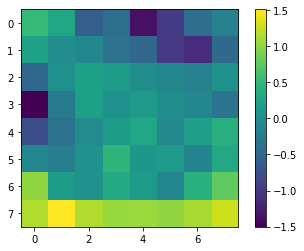

In [36]:
AVG = a/8
plt.imshow(AVG.values.reshape(8,8))
plt.colorbar()

In [4]:
AVG.values

array([ 0.4412535 ,  0.20667809, -0.61849255, -0.45215652, -1.38443582,
       -0.99791856, -0.46623708, -0.24093715,  0.16735466, -0.06987688,
       -0.13519916, -0.40138724, -0.54655695, -1.03330881, -1.14087943,
       -0.49863535, -0.55127682, -0.03893927,  0.15762419,  0.08672506,
       -0.06094022, -0.145343  , -0.20349913, -0.01384304, -1.53851646,
       -0.32619091,  0.15765641, -0.03478394,  0.06214772, -0.04530537,
       -0.14474446, -0.38655408, -0.8346859 , -0.41594124, -0.09855538,
        0.09021421,  0.21530864, -0.12777397,  0.13131615,  0.34486676,
       -0.16162728, -0.28541327, -0.00158359,  0.40434041,  0.03817224,
        0.0610977 , -0.19110897,  0.25794323,  0.91636137,  0.07913269,
       -0.01713727,  0.27365723,  0.09179505, -0.16565811,  0.34350621,
        0.69421214,  1.05304483,  1.4004424 ,  1.05112481,  0.95599601,
        0.96484039,  0.92457198,  1.02378982,  1.1802693 ])

In [10]:
vals = raw_df_nolabels.iloc[p].values

hist, bin_edges = np.histogram(vals, bins = np.linspace(math.ceil(min(vals)), math.floor(max(vals)), 8))
bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2
AVG = bin_centers[np.argmax(hist)]
vals = raw_df_nolabels.iloc[p].values

hist, bin_edges = np.histogram(vals, bins = np.linspace(math.ceil(min(vals)), math.floor(max(vals)), 8))
bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2
AVG = bin_centers[np.argmax(hist)]

# Removing the background from data

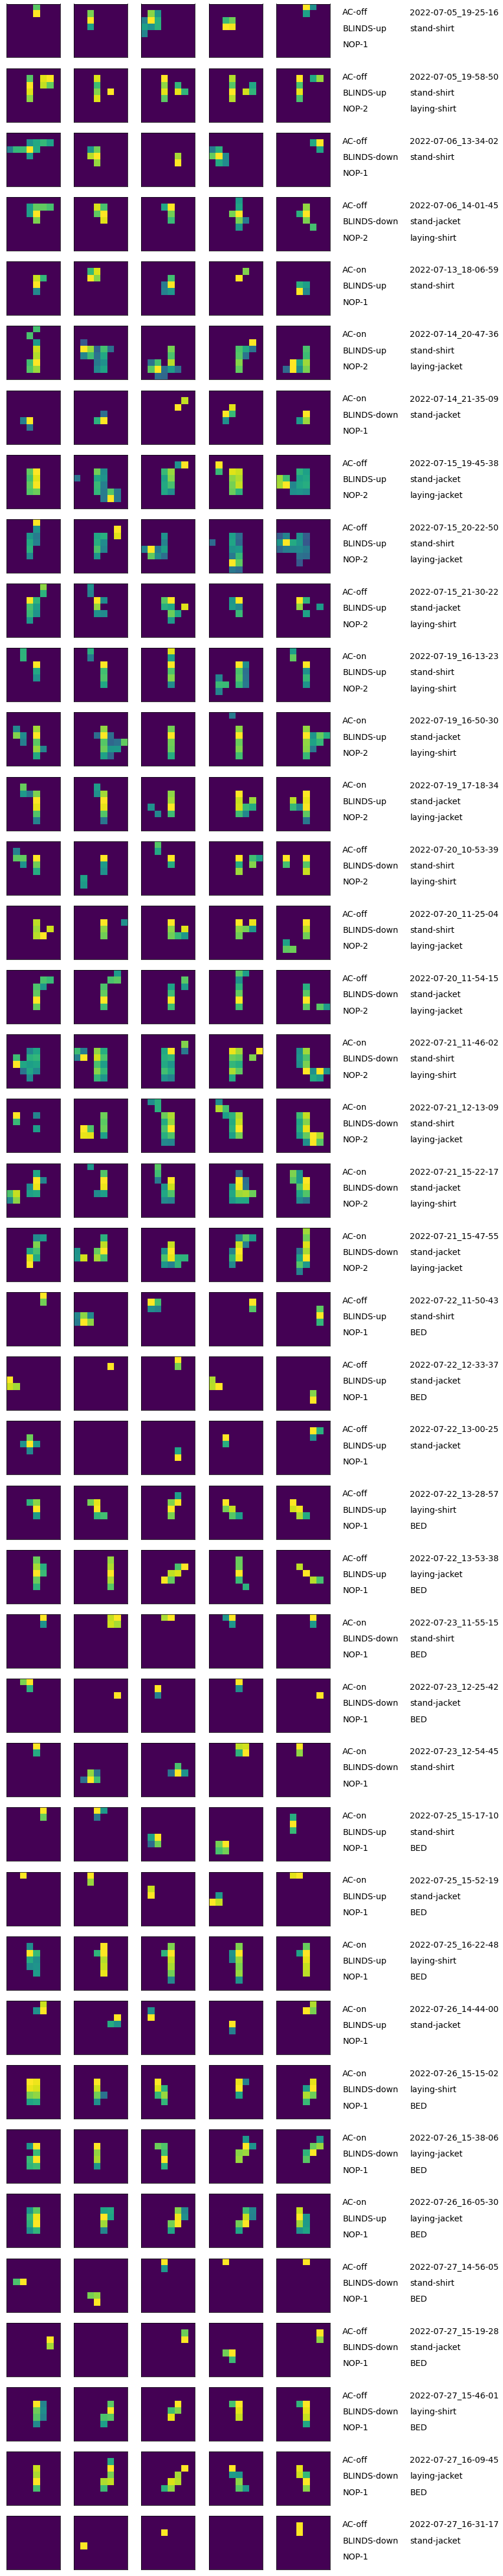

In [5]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm as _pltcolormap
from matplotlib import colors as _pltcolors
import numpy as np
import pandas as pd
import sys
import pathlib
import os
import math

rootdir = r"D:\Code\LDiCS\G06_Hospital\40_Realisation\00_Recorded_Sensor_Data"

col_num = 7
row_num = 40
    
fig, axs = plt.subplots(row_num, col_num, figsize=(col_num * 2, row_num * 2))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

i = 0
j = 0

T = 1.75
T_ac = 1.75

prev_cwd = pathlib.Path.cwd()
os.chdir(rootdir)
for path in pathlib.Path().cwd().iterdir():
    if path.is_dir():
        if ('NOP-1' in path.name) or ('NOP-2' in path.name):
            ac = "---"
            blinds = "---"
            if 'AC-on' in path.name:
                ac = 'AC-on'
            else: ac = 'AC-off'
            if 'BLINDS-up' in path.name:
                blinds = 'BLINDS-up'
            else: blinds = 'BLINDS-down'
            for path2 in pathlib.Path().cwd().iterdir():
                if path2.is_dir():
                    if ("NOP-0" in path2.name) and (path2.name != path.name) and (ac in path2.name) and (blinds in path2.name) and ("BED" not in path2.name):
                        #path2 is a background with no bed, use accordingly
                        raw_df = pd.read_csv(path / "EYE_old.csv")
                        bg_df = pd.read_csv(path2 / "EYE_old.csv")
                        bg_mean = bg_df.drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1).mean()
                        raw_df_nolabels = raw_df.drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1)
                        
                        for o,p in zip(range(5), [5,40,75,110,130]):
                            
                            vals = raw_df_nolabels.iloc[p].values

                            hist, bin_edges = np.histogram(vals, bins = np.linspace(math.ceil(min(vals)), math.floor(max(vals)), 8))
                            bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2
                            AVG_bg = bin_centers[np.argmax(hist)]
                            
                            diff = (raw_df_nolabels.iloc[p] - (AVG_bg + AVG)).values.reshape(8,8)
                            bg_removed = np.where(diff > T, diff, 0) if ac == 'AC-off' else np.where(diff > T_ac, diff, 0) 
                            axs[i,o].imshow(bg_removed)
                        axs[i,5].set_frame_on(False)
                        axs[i,5].text(0, 0.8, ac, fontsize=14)
                        axs[i,5].text(0, 0.5, blinds, fontsize=14)
                        axs[i,5].text(0, 0.2, "NOP-"+path.name[path.name.find('NOP-')+len('NOP-')], fontsize=14)
                        axs[i,6].set_frame_on(False)
                        axs[i,6].text(0, 0.8, path.name.split("__")[0], fontsize=14)
                        axs[i,6].text(0, 0.5, path.name.split("__")[4], fontsize=14)
                        if (len(path.name.split("__")) >= 6):
                            axs[i,6].text(0, 0.2, path.name.split("__")[5], fontsize=14)
            i += 1        
os.chdir(prev_cwd)

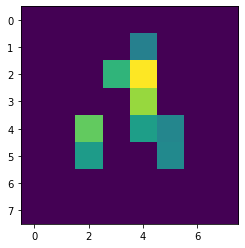

In [31]:
plt.imshow(BG_removed_data[552][:64].reshape(8,8))

In [32]:
BG_removed_data[552][:64].reshape(8,8)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.76084266,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 2.62756065, 4.02522593,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 3.402138  ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 3.0628411 , 0.        , 2.24897707,
        1.84205969, 0.        , 0.        ],
       [0.        , 0.        , 2.21586931, 0.        , 0.        ,
        1.90318801, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

# Preparing data

In [6]:
rootdir = r"D:\Code\LDiCS\G06_Hospital\40_Realisation\00_Recorded_Sensor_Data"
col_num = 7
row_num = 40

i = 0
j = 0

T = 1.75
T_ac = 1.75

BG_removed_data = None
flag = True

prev_cwd = pathlib.Path.cwd()
os.chdir(rootdir)
for path in pathlib.Path().cwd().iterdir():
    if path.is_dir():
        if ('NOP-1' in path.name) or ('NOP-2' in path.name):
            ac = "---"
            blinds = "---"
            if 'AC-on' in path.name:
                ac = 'AC-on'
            else: ac = 'AC-off'
            if 'BLINDS-up' in path.name:
                blinds = 'BLINDS-up'
            else: blinds = 'BLINDS-down'
            for path2 in pathlib.Path().cwd().iterdir():
                if path2.is_dir():
                    if ("NOP-0" in path2.name) and (path2.name != path.name) and (ac in path2.name) and (blinds in path2.name) and ("BED" not in path2.name):
                        #path2 is a background with no bed, use accordingly
                        raw_df = pd.read_csv(path / "EYE_old.csv")
                        bg_df = pd.read_csv(path2 / "EYE_old.csv")
                        bg_mean = bg_df.drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1).mean()
                        raw_df_nolabels = raw_df.drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1)
                        
                        for p in range(raw_df_nolabels.shape[0]):
                            
                            vals = raw_df_nolabels.iloc[p].values

                            hist, bin_edges = np.histogram(vals, bins = np.linspace(math.ceil(min(vals)), math.floor(max(vals)), 8))
                            bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2
                            AVG_bg = bin_centers[np.argmax(hist)]
                            
                            diff = (raw_df_nolabels.iloc[p] - (AVG_bg + AVG)).values.reshape(8,8)
                            bg_removed = np.where(diff > T, diff, 0) if ac == 'AC-off' else np.where(diff > T_ac, diff, 0) 
                            if bg_removed.nonzero()[0].size != 0:
                                if "NOP-1" in path.name:
                                    bg_removed = np.append(bg_removed, 1)
                                elif "NOP-2" in path.name:
                                    bg_removed = np.append(bg_removed, 2)
                                if flag:
                                    BG_removed_data = np.expand_dims(bg_removed, axis=0)
                                    flag = False
                                else:
                                    print (BG_removed_data.shape, " --- ",bg_removed.shape)
                                    BG_removed_data = np.concatenate((BG_removed_data,np.expand_dims(bg_removed, axis=0)), axis=0)
            i += 1        
os.chdir(prev_cwd)

(1, 65)  ---  (65,)
(2, 65)  ---  (65,)
(3, 65)  ---  (65,)
(4, 65)  ---  (65,)
(5, 65)  ---  (65,)
(6, 65)  ---  (65,)
(7, 65)  ---  (65,)
(8, 65)  ---  (65,)
(9, 65)  ---  (65,)
(10, 65)  ---  (65,)
(11, 65)  ---  (65,)
(12, 65)  ---  (65,)
(13, 65)  ---  (65,)
(14, 65)  ---  (65,)
(15, 65)  ---  (65,)
(16, 65)  ---  (65,)
(17, 65)  ---  (65,)
(18, 65)  ---  (65,)
(19, 65)  ---  (65,)
(20, 65)  ---  (65,)
(21, 65)  ---  (65,)
(22, 65)  ---  (65,)
(23, 65)  ---  (65,)
(24, 65)  ---  (65,)
(25, 65)  ---  (65,)
(26, 65)  ---  (65,)
(27, 65)  ---  (65,)
(28, 65)  ---  (65,)
(29, 65)  ---  (65,)
(30, 65)  ---  (65,)
(31, 65)  ---  (65,)
(32, 65)  ---  (65,)
(33, 65)  ---  (65,)
(34, 65)  ---  (65,)
(35, 65)  ---  (65,)
(36, 65)  ---  (65,)
(37, 65)  ---  (65,)
(38, 65)  ---  (65,)
(39, 65)  ---  (65,)
(40, 65)  ---  (65,)
(41, 65)  ---  (65,)
(42, 65)  ---  (65,)
(43, 65)  ---  (65,)
(44, 65)  ---  (65,)
(45, 65)  ---  (65,)
(46, 65)  ---  (65,)
(47, 65)  ---  (65,)
(48, 65)  ---  (65,)
(

(432, 65)  ---  (65,)
(433, 65)  ---  (65,)
(434, 65)  ---  (65,)
(435, 65)  ---  (65,)
(436, 65)  ---  (65,)
(437, 65)  ---  (65,)
(438, 65)  ---  (65,)
(439, 65)  ---  (65,)
(440, 65)  ---  (65,)
(441, 65)  ---  (65,)
(442, 65)  ---  (65,)
(443, 65)  ---  (65,)
(444, 65)  ---  (65,)
(445, 65)  ---  (65,)
(446, 65)  ---  (65,)
(447, 65)  ---  (65,)
(448, 65)  ---  (65,)
(449, 65)  ---  (65,)
(450, 65)  ---  (65,)
(451, 65)  ---  (65,)
(452, 65)  ---  (65,)
(453, 65)  ---  (65,)
(454, 65)  ---  (65,)
(455, 65)  ---  (65,)
(456, 65)  ---  (65,)
(457, 65)  ---  (65,)
(458, 65)  ---  (65,)
(459, 65)  ---  (65,)
(460, 65)  ---  (65,)
(461, 65)  ---  (65,)
(462, 65)  ---  (65,)
(463, 65)  ---  (65,)
(464, 65)  ---  (65,)
(465, 65)  ---  (65,)
(466, 65)  ---  (65,)
(467, 65)  ---  (65,)
(468, 65)  ---  (65,)
(469, 65)  ---  (65,)
(470, 65)  ---  (65,)
(471, 65)  ---  (65,)
(472, 65)  ---  (65,)
(473, 65)  ---  (65,)
(474, 65)  ---  (65,)
(475, 65)  ---  (65,)
(476, 65)  ---  (65,)
(477, 65) 

(914, 65)  ---  (65,)
(915, 65)  ---  (65,)
(916, 65)  ---  (65,)
(917, 65)  ---  (65,)
(918, 65)  ---  (65,)
(919, 65)  ---  (65,)
(920, 65)  ---  (65,)
(921, 65)  ---  (65,)
(922, 65)  ---  (65,)
(923, 65)  ---  (65,)
(924, 65)  ---  (65,)
(925, 65)  ---  (65,)
(926, 65)  ---  (65,)
(927, 65)  ---  (65,)
(928, 65)  ---  (65,)
(929, 65)  ---  (65,)
(930, 65)  ---  (65,)
(931, 65)  ---  (65,)
(932, 65)  ---  (65,)
(933, 65)  ---  (65,)
(934, 65)  ---  (65,)
(935, 65)  ---  (65,)
(936, 65)  ---  (65,)
(937, 65)  ---  (65,)
(938, 65)  ---  (65,)
(939, 65)  ---  (65,)
(940, 65)  ---  (65,)
(941, 65)  ---  (65,)
(942, 65)  ---  (65,)
(943, 65)  ---  (65,)
(944, 65)  ---  (65,)
(945, 65)  ---  (65,)
(946, 65)  ---  (65,)
(947, 65)  ---  (65,)
(948, 65)  ---  (65,)
(949, 65)  ---  (65,)
(950, 65)  ---  (65,)
(951, 65)  ---  (65,)
(952, 65)  ---  (65,)
(953, 65)  ---  (65,)
(954, 65)  ---  (65,)
(955, 65)  ---  (65,)
(956, 65)  ---  (65,)
(957, 65)  ---  (65,)
(958, 65)  ---  (65,)
(959, 65) 

(1274, 65)  ---  (65,)
(1275, 65)  ---  (65,)
(1276, 65)  ---  (65,)
(1277, 65)  ---  (65,)
(1278, 65)  ---  (65,)
(1279, 65)  ---  (65,)
(1280, 65)  ---  (65,)
(1281, 65)  ---  (65,)
(1282, 65)  ---  (65,)
(1283, 65)  ---  (65,)
(1284, 65)  ---  (65,)
(1285, 65)  ---  (65,)
(1286, 65)  ---  (65,)
(1287, 65)  ---  (65,)
(1288, 65)  ---  (65,)
(1289, 65)  ---  (65,)
(1290, 65)  ---  (65,)
(1291, 65)  ---  (65,)
(1292, 65)  ---  (65,)
(1293, 65)  ---  (65,)
(1294, 65)  ---  (65,)
(1295, 65)  ---  (65,)
(1296, 65)  ---  (65,)
(1297, 65)  ---  (65,)
(1298, 65)  ---  (65,)
(1299, 65)  ---  (65,)
(1300, 65)  ---  (65,)
(1301, 65)  ---  (65,)
(1302, 65)  ---  (65,)
(1303, 65)  ---  (65,)
(1304, 65)  ---  (65,)
(1305, 65)  ---  (65,)
(1306, 65)  ---  (65,)
(1307, 65)  ---  (65,)
(1308, 65)  ---  (65,)
(1309, 65)  ---  (65,)
(1310, 65)  ---  (65,)
(1311, 65)  ---  (65,)
(1312, 65)  ---  (65,)
(1313, 65)  ---  (65,)
(1314, 65)  ---  (65,)
(1315, 65)  ---  (65,)
(1316, 65)  ---  (65,)
(1317, 65) 

(1713, 65)  ---  (65,)
(1714, 65)  ---  (65,)
(1715, 65)  ---  (65,)
(1716, 65)  ---  (65,)
(1717, 65)  ---  (65,)
(1718, 65)  ---  (65,)
(1719, 65)  ---  (65,)
(1720, 65)  ---  (65,)
(1721, 65)  ---  (65,)
(1722, 65)  ---  (65,)
(1723, 65)  ---  (65,)
(1724, 65)  ---  (65,)
(1725, 65)  ---  (65,)
(1726, 65)  ---  (65,)
(1727, 65)  ---  (65,)
(1728, 65)  ---  (65,)
(1729, 65)  ---  (65,)
(1730, 65)  ---  (65,)
(1731, 65)  ---  (65,)
(1732, 65)  ---  (65,)
(1733, 65)  ---  (65,)
(1734, 65)  ---  (65,)
(1735, 65)  ---  (65,)
(1736, 65)  ---  (65,)
(1737, 65)  ---  (65,)
(1738, 65)  ---  (65,)
(1739, 65)  ---  (65,)
(1740, 65)  ---  (65,)
(1741, 65)  ---  (65,)
(1742, 65)  ---  (65,)
(1743, 65)  ---  (65,)
(1744, 65)  ---  (65,)
(1745, 65)  ---  (65,)
(1746, 65)  ---  (65,)
(1747, 65)  ---  (65,)
(1748, 65)  ---  (65,)
(1749, 65)  ---  (65,)
(1750, 65)  ---  (65,)
(1751, 65)  ---  (65,)
(1752, 65)  ---  (65,)
(1753, 65)  ---  (65,)
(1754, 65)  ---  (65,)
(1755, 65)  ---  (65,)
(1756, 65) 

(2077, 65)  ---  (65,)
(2078, 65)  ---  (65,)
(2079, 65)  ---  (65,)
(2080, 65)  ---  (65,)
(2081, 65)  ---  (65,)
(2082, 65)  ---  (65,)
(2083, 65)  ---  (65,)
(2084, 65)  ---  (65,)
(2085, 65)  ---  (65,)
(2086, 65)  ---  (65,)
(2087, 65)  ---  (65,)
(2088, 65)  ---  (65,)
(2089, 65)  ---  (65,)
(2090, 65)  ---  (65,)
(2091, 65)  ---  (65,)
(2092, 65)  ---  (65,)
(2093, 65)  ---  (65,)
(2094, 65)  ---  (65,)
(2095, 65)  ---  (65,)
(2096, 65)  ---  (65,)
(2097, 65)  ---  (65,)
(2098, 65)  ---  (65,)
(2099, 65)  ---  (65,)
(2100, 65)  ---  (65,)
(2101, 65)  ---  (65,)
(2102, 65)  ---  (65,)
(2103, 65)  ---  (65,)
(2104, 65)  ---  (65,)
(2105, 65)  ---  (65,)
(2106, 65)  ---  (65,)
(2107, 65)  ---  (65,)
(2108, 65)  ---  (65,)
(2109, 65)  ---  (65,)
(2110, 65)  ---  (65,)
(2111, 65)  ---  (65,)
(2112, 65)  ---  (65,)
(2113, 65)  ---  (65,)
(2114, 65)  ---  (65,)
(2115, 65)  ---  (65,)
(2116, 65)  ---  (65,)
(2117, 65)  ---  (65,)
(2118, 65)  ---  (65,)
(2119, 65)  ---  (65,)
(2120, 65) 

(2463, 65)  ---  (65,)
(2464, 65)  ---  (65,)
(2465, 65)  ---  (65,)
(2466, 65)  ---  (65,)
(2467, 65)  ---  (65,)
(2468, 65)  ---  (65,)
(2469, 65)  ---  (65,)
(2470, 65)  ---  (65,)
(2471, 65)  ---  (65,)
(2472, 65)  ---  (65,)
(2473, 65)  ---  (65,)
(2474, 65)  ---  (65,)
(2475, 65)  ---  (65,)
(2476, 65)  ---  (65,)
(2477, 65)  ---  (65,)
(2478, 65)  ---  (65,)
(2479, 65)  ---  (65,)
(2480, 65)  ---  (65,)
(2481, 65)  ---  (65,)
(2482, 65)  ---  (65,)
(2483, 65)  ---  (65,)
(2484, 65)  ---  (65,)
(2485, 65)  ---  (65,)
(2486, 65)  ---  (65,)
(2487, 65)  ---  (65,)
(2488, 65)  ---  (65,)
(2489, 65)  ---  (65,)
(2490, 65)  ---  (65,)
(2491, 65)  ---  (65,)
(2492, 65)  ---  (65,)
(2493, 65)  ---  (65,)
(2494, 65)  ---  (65,)
(2495, 65)  ---  (65,)
(2496, 65)  ---  (65,)
(2497, 65)  ---  (65,)
(2498, 65)  ---  (65,)
(2499, 65)  ---  (65,)
(2500, 65)  ---  (65,)
(2501, 65)  ---  (65,)
(2502, 65)  ---  (65,)
(2503, 65)  ---  (65,)
(2504, 65)  ---  (65,)
(2505, 65)  ---  (65,)
(2506, 65) 

(2846, 65)  ---  (65,)
(2847, 65)  ---  (65,)
(2848, 65)  ---  (65,)
(2849, 65)  ---  (65,)
(2850, 65)  ---  (65,)
(2851, 65)  ---  (65,)
(2852, 65)  ---  (65,)
(2853, 65)  ---  (65,)
(2854, 65)  ---  (65,)
(2855, 65)  ---  (65,)
(2856, 65)  ---  (65,)
(2857, 65)  ---  (65,)
(2858, 65)  ---  (65,)
(2859, 65)  ---  (65,)
(2860, 65)  ---  (65,)
(2861, 65)  ---  (65,)
(2862, 65)  ---  (65,)
(2863, 65)  ---  (65,)
(2864, 65)  ---  (65,)
(2865, 65)  ---  (65,)
(2866, 65)  ---  (65,)
(2867, 65)  ---  (65,)
(2868, 65)  ---  (65,)
(2869, 65)  ---  (65,)
(2870, 65)  ---  (65,)
(2871, 65)  ---  (65,)
(2872, 65)  ---  (65,)
(2873, 65)  ---  (65,)
(2874, 65)  ---  (65,)
(2875, 65)  ---  (65,)
(2876, 65)  ---  (65,)
(2877, 65)  ---  (65,)
(2878, 65)  ---  (65,)
(2879, 65)  ---  (65,)
(2880, 65)  ---  (65,)
(2881, 65)  ---  (65,)
(2882, 65)  ---  (65,)
(2883, 65)  ---  (65,)
(2884, 65)  ---  (65,)
(2885, 65)  ---  (65,)
(2886, 65)  ---  (65,)
(2887, 65)  ---  (65,)
(2888, 65)  ---  (65,)
(2889, 65) 

(3254, 65)  ---  (65,)
(3255, 65)  ---  (65,)
(3256, 65)  ---  (65,)
(3257, 65)  ---  (65,)
(3258, 65)  ---  (65,)
(3259, 65)  ---  (65,)
(3260, 65)  ---  (65,)
(3261, 65)  ---  (65,)
(3262, 65)  ---  (65,)
(3263, 65)  ---  (65,)
(3264, 65)  ---  (65,)
(3265, 65)  ---  (65,)
(3266, 65)  ---  (65,)
(3267, 65)  ---  (65,)
(3268, 65)  ---  (65,)
(3269, 65)  ---  (65,)
(3270, 65)  ---  (65,)
(3271, 65)  ---  (65,)
(3272, 65)  ---  (65,)
(3273, 65)  ---  (65,)
(3274, 65)  ---  (65,)
(3275, 65)  ---  (65,)
(3276, 65)  ---  (65,)
(3277, 65)  ---  (65,)
(3278, 65)  ---  (65,)
(3279, 65)  ---  (65,)
(3280, 65)  ---  (65,)
(3281, 65)  ---  (65,)
(3282, 65)  ---  (65,)
(3283, 65)  ---  (65,)
(3284, 65)  ---  (65,)
(3285, 65)  ---  (65,)
(3286, 65)  ---  (65,)
(3287, 65)  ---  (65,)
(3288, 65)  ---  (65,)
(3289, 65)  ---  (65,)
(3290, 65)  ---  (65,)
(3291, 65)  ---  (65,)
(3292, 65)  ---  (65,)
(3293, 65)  ---  (65,)
(3294, 65)  ---  (65,)
(3295, 65)  ---  (65,)
(3296, 65)  ---  (65,)
(3297, 65) 

(3663, 65)  ---  (65,)
(3664, 65)  ---  (65,)
(3665, 65)  ---  (65,)
(3666, 65)  ---  (65,)
(3667, 65)  ---  (65,)
(3668, 65)  ---  (65,)
(3669, 65)  ---  (65,)
(3670, 65)  ---  (65,)
(3671, 65)  ---  (65,)
(3672, 65)  ---  (65,)
(3673, 65)  ---  (65,)
(3674, 65)  ---  (65,)
(3675, 65)  ---  (65,)
(3676, 65)  ---  (65,)
(3677, 65)  ---  (65,)
(3678, 65)  ---  (65,)
(3679, 65)  ---  (65,)
(3680, 65)  ---  (65,)
(3681, 65)  ---  (65,)
(3682, 65)  ---  (65,)
(3683, 65)  ---  (65,)
(3684, 65)  ---  (65,)
(3685, 65)  ---  (65,)
(3686, 65)  ---  (65,)
(3687, 65)  ---  (65,)
(3688, 65)  ---  (65,)
(3689, 65)  ---  (65,)
(3690, 65)  ---  (65,)
(3691, 65)  ---  (65,)
(3692, 65)  ---  (65,)
(3693, 65)  ---  (65,)
(3694, 65)  ---  (65,)
(3695, 65)  ---  (65,)
(3696, 65)  ---  (65,)
(3697, 65)  ---  (65,)
(3698, 65)  ---  (65,)
(3699, 65)  ---  (65,)
(3700, 65)  ---  (65,)
(3701, 65)  ---  (65,)
(3702, 65)  ---  (65,)
(3703, 65)  ---  (65,)
(3704, 65)  ---  (65,)
(3705, 65)  ---  (65,)
(3706, 65) 

(4021, 65)  ---  (65,)
(4022, 65)  ---  (65,)
(4023, 65)  ---  (65,)
(4024, 65)  ---  (65,)
(4025, 65)  ---  (65,)
(4026, 65)  ---  (65,)
(4027, 65)  ---  (65,)
(4028, 65)  ---  (65,)
(4029, 65)  ---  (65,)
(4030, 65)  ---  (65,)
(4031, 65)  ---  (65,)
(4032, 65)  ---  (65,)
(4033, 65)  ---  (65,)
(4034, 65)  ---  (65,)
(4035, 65)  ---  (65,)
(4036, 65)  ---  (65,)
(4037, 65)  ---  (65,)
(4038, 65)  ---  (65,)
(4039, 65)  ---  (65,)
(4040, 65)  ---  (65,)
(4041, 65)  ---  (65,)
(4042, 65)  ---  (65,)
(4043, 65)  ---  (65,)
(4044, 65)  ---  (65,)
(4045, 65)  ---  (65,)
(4046, 65)  ---  (65,)
(4047, 65)  ---  (65,)
(4048, 65)  ---  (65,)
(4049, 65)  ---  (65,)
(4050, 65)  ---  (65,)
(4051, 65)  ---  (65,)
(4052, 65)  ---  (65,)
(4053, 65)  ---  (65,)
(4054, 65)  ---  (65,)
(4055, 65)  ---  (65,)
(4056, 65)  ---  (65,)
(4057, 65)  ---  (65,)
(4058, 65)  ---  (65,)
(4059, 65)  ---  (65,)
(4060, 65)  ---  (65,)
(4061, 65)  ---  (65,)
(4062, 65)  ---  (65,)
(4063, 65)  ---  (65,)
(4064, 65) 

(4445, 65)  ---  (65,)
(4446, 65)  ---  (65,)
(4447, 65)  ---  (65,)
(4448, 65)  ---  (65,)
(4449, 65)  ---  (65,)
(4450, 65)  ---  (65,)
(4451, 65)  ---  (65,)
(4452, 65)  ---  (65,)
(4453, 65)  ---  (65,)
(4454, 65)  ---  (65,)
(4455, 65)  ---  (65,)
(4456, 65)  ---  (65,)
(4457, 65)  ---  (65,)
(4458, 65)  ---  (65,)
(4459, 65)  ---  (65,)
(4460, 65)  ---  (65,)
(4461, 65)  ---  (65,)
(4462, 65)  ---  (65,)
(4463, 65)  ---  (65,)
(4464, 65)  ---  (65,)
(4465, 65)  ---  (65,)
(4466, 65)  ---  (65,)
(4467, 65)  ---  (65,)
(4468, 65)  ---  (65,)
(4469, 65)  ---  (65,)
(4470, 65)  ---  (65,)
(4471, 65)  ---  (65,)
(4472, 65)  ---  (65,)
(4473, 65)  ---  (65,)
(4474, 65)  ---  (65,)
(4475, 65)  ---  (65,)
(4476, 65)  ---  (65,)
(4477, 65)  ---  (65,)
(4478, 65)  ---  (65,)
(4479, 65)  ---  (65,)
(4480, 65)  ---  (65,)
(4481, 65)  ---  (65,)
(4482, 65)  ---  (65,)
(4483, 65)  ---  (65,)
(4484, 65)  ---  (65,)
(4485, 65)  ---  (65,)
(4486, 65)  ---  (65,)
(4487, 65)  ---  (65,)
(4488, 65) 

(4857, 65)  ---  (65,)
(4858, 65)  ---  (65,)
(4859, 65)  ---  (65,)
(4860, 65)  ---  (65,)
(4861, 65)  ---  (65,)
(4862, 65)  ---  (65,)
(4863, 65)  ---  (65,)
(4864, 65)  ---  (65,)
(4865, 65)  ---  (65,)
(4866, 65)  ---  (65,)
(4867, 65)  ---  (65,)
(4868, 65)  ---  (65,)
(4869, 65)  ---  (65,)
(4870, 65)  ---  (65,)
(4871, 65)  ---  (65,)
(4872, 65)  ---  (65,)
(4873, 65)  ---  (65,)
(4874, 65)  ---  (65,)
(4875, 65)  ---  (65,)
(4876, 65)  ---  (65,)
(4877, 65)  ---  (65,)
(4878, 65)  ---  (65,)
(4879, 65)  ---  (65,)
(4880, 65)  ---  (65,)
(4881, 65)  ---  (65,)
(4882, 65)  ---  (65,)
(4883, 65)  ---  (65,)
(4884, 65)  ---  (65,)
(4885, 65)  ---  (65,)
(4886, 65)  ---  (65,)
(4887, 65)  ---  (65,)
(4888, 65)  ---  (65,)
(4889, 65)  ---  (65,)
(4890, 65)  ---  (65,)
(4891, 65)  ---  (65,)
(4892, 65)  ---  (65,)
(4893, 65)  ---  (65,)
(4894, 65)  ---  (65,)
(4895, 65)  ---  (65,)
(4896, 65)  ---  (65,)
(4897, 65)  ---  (65,)
(4898, 65)  ---  (65,)
(4899, 65)  ---  (65,)
(4900, 65) 

(5278, 65)  ---  (65,)
(5279, 65)  ---  (65,)
(5280, 65)  ---  (65,)
(5281, 65)  ---  (65,)
(5282, 65)  ---  (65,)
(5283, 65)  ---  (65,)
(5284, 65)  ---  (65,)
(5285, 65)  ---  (65,)
(5286, 65)  ---  (65,)
(5287, 65)  ---  (65,)
(5288, 65)  ---  (65,)
(5289, 65)  ---  (65,)
(5290, 65)  ---  (65,)
(5291, 65)  ---  (65,)
(5292, 65)  ---  (65,)
(5293, 65)  ---  (65,)
(5294, 65)  ---  (65,)
(5295, 65)  ---  (65,)
(5296, 65)  ---  (65,)
(5297, 65)  ---  (65,)
(5298, 65)  ---  (65,)
(5299, 65)  ---  (65,)
(5300, 65)  ---  (65,)
(5301, 65)  ---  (65,)
(5302, 65)  ---  (65,)
(5303, 65)  ---  (65,)
(5304, 65)  ---  (65,)
(5305, 65)  ---  (65,)
(5306, 65)  ---  (65,)
(5307, 65)  ---  (65,)
(5308, 65)  ---  (65,)
(5309, 65)  ---  (65,)
(5310, 65)  ---  (65,)
(5311, 65)  ---  (65,)
(5312, 65)  ---  (65,)
(5313, 65)  ---  (65,)
(5314, 65)  ---  (65,)
(5315, 65)  ---  (65,)
(5316, 65)  ---  (65,)
(5317, 65)  ---  (65,)
(5318, 65)  ---  (65,)
(5319, 65)  ---  (65,)
(5320, 65)  ---  (65,)
(5321, 65) 

(5644, 65)  ---  (65,)
(5645, 65)  ---  (65,)
(5646, 65)  ---  (65,)
(5647, 65)  ---  (65,)
(5648, 65)  ---  (65,)
(5649, 65)  ---  (65,)
(5650, 65)  ---  (65,)
(5651, 65)  ---  (65,)
(5652, 65)  ---  (65,)
(5653, 65)  ---  (65,)
(5654, 65)  ---  (65,)
(5655, 65)  ---  (65,)
(5656, 65)  ---  (65,)
(5657, 65)  ---  (65,)
(5658, 65)  ---  (65,)
(5659, 65)  ---  (65,)
(5660, 65)  ---  (65,)
(5661, 65)  ---  (65,)
(5662, 65)  ---  (65,)
(5663, 65)  ---  (65,)
(5664, 65)  ---  (65,)
(5665, 65)  ---  (65,)
(5666, 65)  ---  (65,)
(5667, 65)  ---  (65,)
(5668, 65)  ---  (65,)
(5669, 65)  ---  (65,)
(5670, 65)  ---  (65,)
(5671, 65)  ---  (65,)
(5672, 65)  ---  (65,)
(5673, 65)  ---  (65,)
(5674, 65)  ---  (65,)
(5675, 65)  ---  (65,)
(5676, 65)  ---  (65,)
(5677, 65)  ---  (65,)
(5678, 65)  ---  (65,)
(5679, 65)  ---  (65,)
(5680, 65)  ---  (65,)
(5681, 65)  ---  (65,)
(5682, 65)  ---  (65,)
(5683, 65)  ---  (65,)
(5684, 65)  ---  (65,)
(5685, 65)  ---  (65,)
(5686, 65)  ---  (65,)
(5687, 65) 

(6022, 65)  ---  (65,)
(6023, 65)  ---  (65,)
(6024, 65)  ---  (65,)
(6025, 65)  ---  (65,)
(6026, 65)  ---  (65,)
(6027, 65)  ---  (65,)
(6028, 65)  ---  (65,)
(6029, 65)  ---  (65,)
(6030, 65)  ---  (65,)
(6031, 65)  ---  (65,)
(6032, 65)  ---  (65,)
(6033, 65)  ---  (65,)
(6034, 65)  ---  (65,)
(6035, 65)  ---  (65,)
(6036, 65)  ---  (65,)
(6037, 65)  ---  (65,)
(6038, 65)  ---  (65,)
(6039, 65)  ---  (65,)
(6040, 65)  ---  (65,)
(6041, 65)  ---  (65,)
(6042, 65)  ---  (65,)
(6043, 65)  ---  (65,)
(6044, 65)  ---  (65,)
(6045, 65)  ---  (65,)
(6046, 65)  ---  (65,)
(6047, 65)  ---  (65,)
(6048, 65)  ---  (65,)
(6049, 65)  ---  (65,)
(6050, 65)  ---  (65,)
(6051, 65)  ---  (65,)
(6052, 65)  ---  (65,)
(6053, 65)  ---  (65,)
(6054, 65)  ---  (65,)
(6055, 65)  ---  (65,)
(6056, 65)  ---  (65,)
(6057, 65)  ---  (65,)
(6058, 65)  ---  (65,)
(6059, 65)  ---  (65,)
(6060, 65)  ---  (65,)
(6061, 65)  ---  (65,)
(6062, 65)  ---  (65,)
(6063, 65)  ---  (65,)
(6064, 65)  ---  (65,)
(6065, 65) 

(6380, 65)  ---  (65,)
(6381, 65)  ---  (65,)
(6382, 65)  ---  (65,)
(6383, 65)  ---  (65,)
(6384, 65)  ---  (65,)
(6385, 65)  ---  (65,)
(6386, 65)  ---  (65,)
(6387, 65)  ---  (65,)
(6388, 65)  ---  (65,)
(6389, 65)  ---  (65,)
(6390, 65)  ---  (65,)
(6391, 65)  ---  (65,)
(6392, 65)  ---  (65,)
(6393, 65)  ---  (65,)
(6394, 65)  ---  (65,)
(6395, 65)  ---  (65,)
(6396, 65)  ---  (65,)
(6397, 65)  ---  (65,)
(6398, 65)  ---  (65,)
(6399, 65)  ---  (65,)
(6400, 65)  ---  (65,)
(6401, 65)  ---  (65,)
(6402, 65)  ---  (65,)
(6403, 65)  ---  (65,)
(6404, 65)  ---  (65,)
(6405, 65)  ---  (65,)
(6406, 65)  ---  (65,)
(6407, 65)  ---  (65,)
(6408, 65)  ---  (65,)
(6409, 65)  ---  (65,)
(6410, 65)  ---  (65,)
(6411, 65)  ---  (65,)
(6412, 65)  ---  (65,)
(6413, 65)  ---  (65,)
(6414, 65)  ---  (65,)
(6415, 65)  ---  (65,)
(6416, 65)  ---  (65,)
(6417, 65)  ---  (65,)
(6418, 65)  ---  (65,)
(6419, 65)  ---  (65,)
(6420, 65)  ---  (65,)
(6421, 65)  ---  (65,)
(6422, 65)  ---  (65,)
(6423, 65) 

(6742, 65)  ---  (65,)
(6743, 65)  ---  (65,)
(6744, 65)  ---  (65,)
(6745, 65)  ---  (65,)
(6746, 65)  ---  (65,)
(6747, 65)  ---  (65,)
(6748, 65)  ---  (65,)
(6749, 65)  ---  (65,)
(6750, 65)  ---  (65,)
(6751, 65)  ---  (65,)
(6752, 65)  ---  (65,)
(6753, 65)  ---  (65,)
(6754, 65)  ---  (65,)
(6755, 65)  ---  (65,)
(6756, 65)  ---  (65,)
(6757, 65)  ---  (65,)
(6758, 65)  ---  (65,)
(6759, 65)  ---  (65,)
(6760, 65)  ---  (65,)
(6761, 65)  ---  (65,)
(6762, 65)  ---  (65,)
(6763, 65)  ---  (65,)
(6764, 65)  ---  (65,)
(6765, 65)  ---  (65,)
(6766, 65)  ---  (65,)
(6767, 65)  ---  (65,)
(6768, 65)  ---  (65,)
(6769, 65)  ---  (65,)
(6770, 65)  ---  (65,)
(6771, 65)  ---  (65,)
(6772, 65)  ---  (65,)
(6773, 65)  ---  (65,)
(6774, 65)  ---  (65,)
(6775, 65)  ---  (65,)
(6776, 65)  ---  (65,)
(6777, 65)  ---  (65,)
(6778, 65)  ---  (65,)
(6779, 65)  ---  (65,)
(6780, 65)  ---  (65,)
(6781, 65)  ---  (65,)
(6782, 65)  ---  (65,)
(6783, 65)  ---  (65,)
(6784, 65)  ---  (65,)
(6785, 65) 

In [7]:
BG_removed_data[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 4.37756065,
       2.52522593, 0.        , 0.        , 0.        , 1.75280217,
       0.        , 0.        , 3.99906965, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ])

# BG_removed_data --- use that for training
## first 64 values are thermal values, last value is NOP - either 1 or 2

In [ ]:
# Creates a simple feature vector
flag = True
X = None
Y = None
for rec in BG_removed_data:
    A = np.array([[np.std(rec[:63]), np.mean(rec[:63]), np.min(rec[np.nonzero(rec[:63])]), max(rec[:63]), np.count_nonzero(rec[:63])]])
    B = np.array([[rec[64]]])
    if flag:
        X = A
        Y = B
        flag = False
    else:
        print (X.shape, " --- ",A.shape)
        X = np.concatenate((X,A), axis=0)
        Y = np.concatenate((Y,B), axis=0)

In [ ]:
import tensorflow as tf 

In [ ]:

from sklearn.utils import shuffle
X_new, Y_new = shuffle(X, Y)

In [ ]:
X_new.shape

In [ ]:
X_train = X_new[0:5668]
X_test = X_new[5668:]

Y_train = Y_new[0:5668]
Y_test = Y_new[5668:]

# Model is built here

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, activation='relu', input_dim=5))
model.add(tf.keras.layers.Dense(40, activation='relu'))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
 Y_train = tf.keras.utils.to_categorical(Y_train-1)

In [ ]:
 Y_test = tf.keras.utils.to_categorical(Y_test-1)

In [ ]:
model.fit(X_train, Y_train, epochs=1000, batch_size=32, validation_data=(X_test, Y_test))
#model.summary()

In [ ]:
model.evaluate(X_test, Y_test)

In [ ]:
model.summary()

In [ ]:
model.predict(X_test[0:1,:])

In [ ]:
model.save(r"D:\Code\LDiCS\G06_Hospital\40_Realisation\10_Prototype_1\classifier\model_1000.h5")

In [ ]:
np.array([0,0,0,0,4]).reshape(1, 5)

In [ ]:
model.predict(np.array([0,0,0,0,13]).reshape(1, 5))[0,0]